<a href="https://colab.research.google.com/github/davidofitaly/04_polynomial_regression_projects/blob/main/01_poly_regression_with_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.set_printoptions(precision=4, suppress=True)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.1.4
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


###Data generation

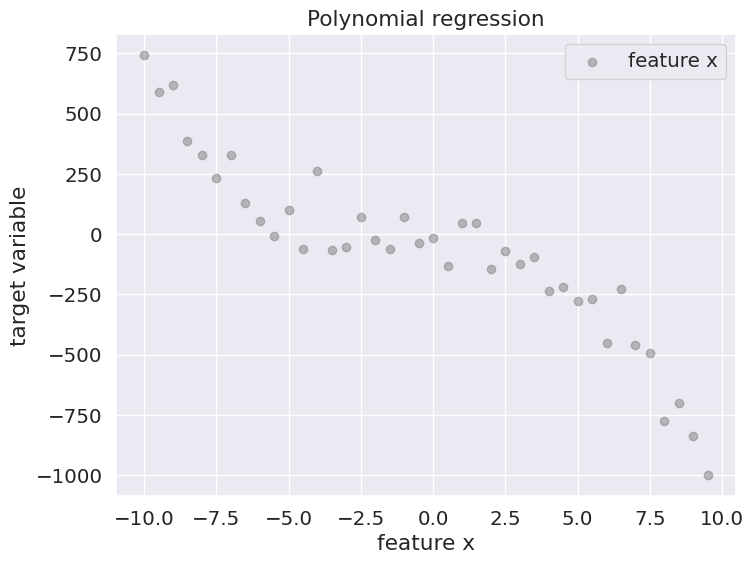

In [ ]:
# Create input data for polynomial regression
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(len(X))
y = -X**3 - 2*X**2 + 3*X -2 + noise
X = X.reshape(40, 1)

# Create and display scatter plot for generated data
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x', color='grey', alpha=0.5)
plt.legend()
plt.show()

###Linear model of the first degree

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
regressor_1 = LinearRegression()
regressor_1.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Extract the intercept of the first feature from the linear regression model
intercept_1 = regressor_1.intercept_

intercept_1

-93.04067767353922

In [ ]:
# Extract the coefficient of the first feature from the linear regression model
coef_1 = regressor_1.coef_[0]

coef_1

-58.3385848663452

####Linear model of the first degree - visualization

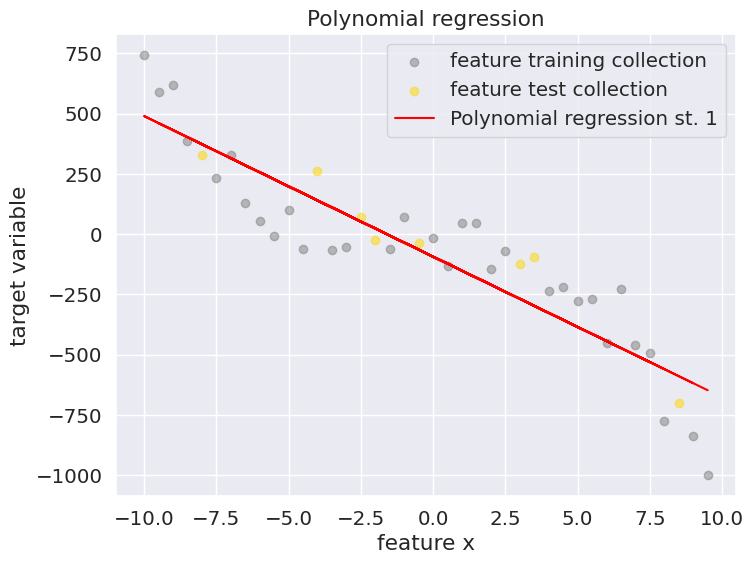

In [ ]:
# Plot training and test datasets with a polynomial regression line of degree 1
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label='Polynomial regression st. 1')
plt.legend()
plt.show()

####Model-based prediction

In [ ]:
# Generate predictions for the test set using the trained linear regression model
y_pred_1 = regressor_1.predict(X_test)

# Create a DataFrame to compare the true values (y_yest) with the predicted values
predictions_1 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_1})
predictions_1.head()

,y_true,y_pred
0,-11.939760,-54.440631
1,-123.213118,23.320206
2,-26.481622,49.240485
3,-114.799382,-235.882584
4,367.034160,334.363555


In [ ]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_1['error'] = predictions_1['y_true'] - predictions_1['y_pred']
predictions_1.head()

,y_true,y_pred,error
0,-11.939760,-54.440631,42.500871
1,-123.213118,23.320206,-146.533324
2,-26.481622,49.240485,-75.722107
3,-114.799382,-235.882584,121.083203
4,367.034160,334.363555,32.670606


In [ ]:
# Calculate the squared error by squaring the prediction errors
predictions_1['error_squared'] = predictions_1['error'] **2
predictions_1.head()

,y_true,y_pred,error,error_squared
0,-11.939760,-54.440631,42.500871,1806.324032
1,-123.213118,23.320206,-146.533324,21472.015045
2,-26.481622,49.240485,-75.722107,5733.837504
3,-114.799382,-235.882584,121.083203,14661.141985
4,367.034160,334.363555,32.670606,1067.368466


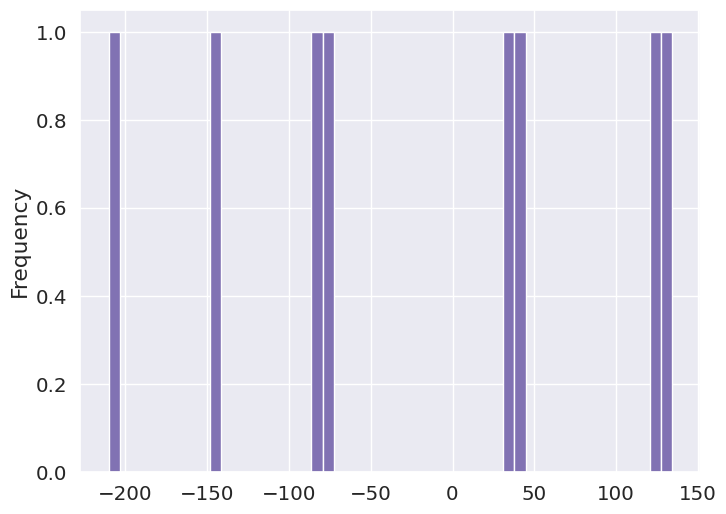

In [ ]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_1['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

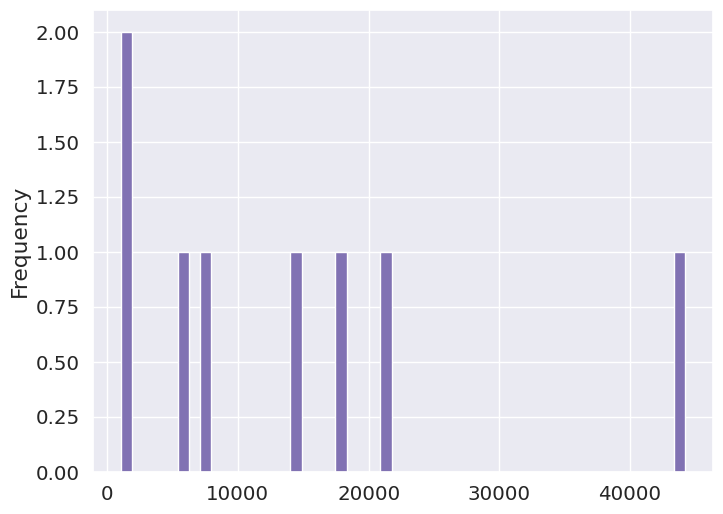

In [ ]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_1['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the first degree  metrics

- Mean Absolute Error

In [ ]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_1)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_1):.3f}")

The model makes an average error of 105.946


- Mean Squared Error

In [ ]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_1)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_1):.3f}')

The mean squared error of the model is: 14263.442


- Root Mean Squared Error - RMSE

In [ ]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 119.430


- Max Error

In [ ]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_1)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 210.215


- R2 score - coefficient of determination

In [ ]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_1)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.825


###Linear model of the second degree

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Transform the training and testing data into polynomial features
X_train_poly_2 = poly.fit_transform(X_train)
X_test_poly_2 = poly.fit_transform(X_test)


In [ ]:
X_train_poly_2[:10]

array([[ 1.  ,  9.5 , 90.25],
       [ 1.  , -7.  , 49.  ],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  , -5.5 , 30.25],
       [ 1.  , -3.5 , 12.25],
       [ 1.  ,  5.5 , 30.25],
       [ 1.  ,  7.  , 49.  ],
       [ 1.  , -6.  , 36.  ],
       [ 1.  , -1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ]])

In [ ]:
X_test_poly_2[:10]

array([[ 1.  , -0.5 ,  0.25],
       [ 1.  , -2.  ,  4.  ],
       [ 1.  , -2.5 ,  6.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  , -8.  , 64.  ],
       [ 1.  , -4.  , 16.  ],
       [ 1.  ,  8.5 , 72.25],
       [ 1.  ,  3.5 , 12.25]])

In [ ]:
# Create an instance of the LinearRegression class
regressor_2 = LinearRegression()
regressor_2.fit(X_train_poly_2, y_train)

LinearRegression()

In [ ]:
# Extract the intercept of the first feature from the linear regression model
intercept_2 = regressor_2.intercept_

intercept_2

-37.87454573532459

In [ ]:
# Extract the coefficient of the first feature from the linear regression model
coef_2 = regressor_2.coef_

coef_2

array([  0.    , -58.888 ,  -0.7925])

####Linear model of the second degree - visualization

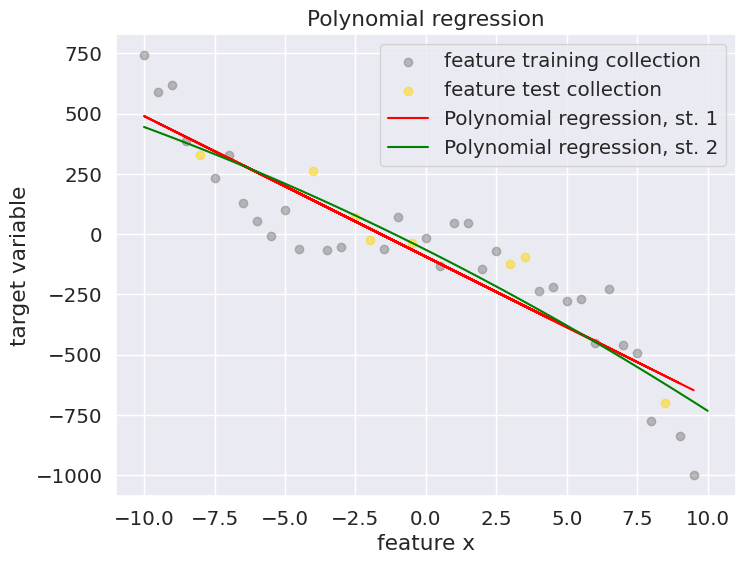

In [ ]:
X_range_2 = np.linspace(-10, 10, 100).reshape(-1, 1)  # Generate 100 evenly spaced values between -10 and 10 for plotting
X_range_poly_2 = poly.transform(X_range_2) # Transform the generated values into polynomial features
y_range_pred_2 = regressor_2.predict(X_range_poly_2) # Predict the target values using the trained polynomial regression model

# Plot training and test datasets with a polynomial regression line of degree 1,2
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Polynomial regression, st. 1")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.legend()
plt.show()

####Model-based prediction

In [ ]:
# Generate predictions for the test set using the trained linear regression model
y_pred_2 = regressor_2.predict(X_test_poly_2)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_2 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_2})
predictions_2.head()

,y_true,y_pred
0,-38.387578,-35.425958
1,-22.477752,49.934026
2,72.195525,77.594827
3,-123.459567,-248.468479
4,328.968897,355.710238


In [ ]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_2['error'] = predictions_2['y_true'] - predictions_2['y_pred']
predictions_2.head()

,y_true,y_pred,error
0,-11.939760,-11.839603,-0.100157
1,-123.213118,62.704461,-185.917579
2,-26.481622,86.365562,-112.847184
3,-114.799382,-206.546870,91.747488
4,367.034160,307.469279,59.564881


In [ ]:
# Calculate the squared error by squaring the prediction errors
predictions_2['error_squared'] = predictions_2['error'] **2
predictions_2.head()


,y_true,y_pred,error,error_squared
0,-11.939760,-11.839603,-0.100157,0.010031
1,-123.213118,62.704461,-185.917579,34565.346204
2,-26.481622,86.365562,-112.847184,12734.486877
3,-114.799382,-206.546870,91.747488,8417.601588
4,367.034160,307.469279,59.564881,3547.975065


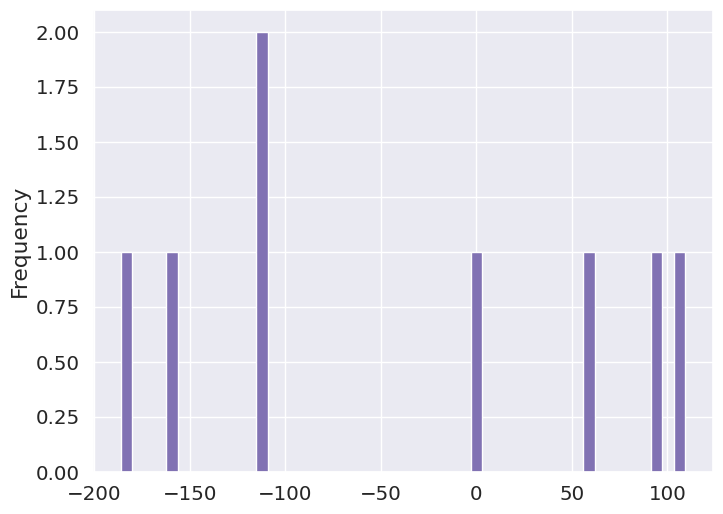

In [ ]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_2['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

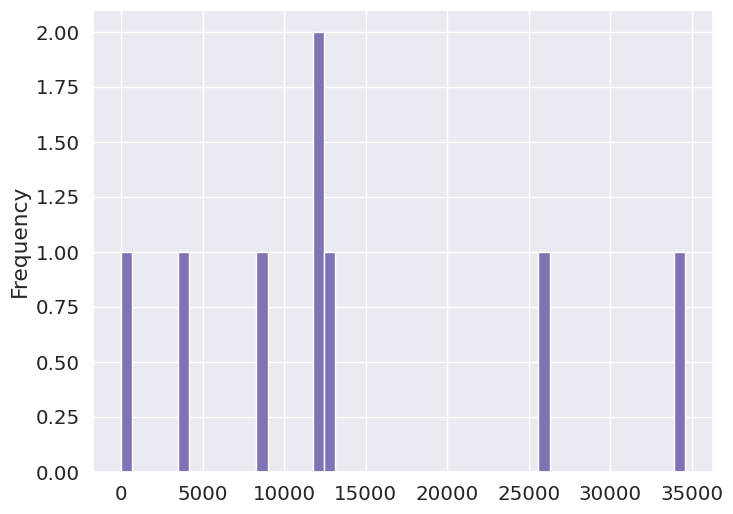

In [ ]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_2['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the second degree metric

- Mean Absolute Error

In [ ]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_2)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_2):.3f}")

The model makes an average error of 103.837


- Mean Squared Error

In [ ]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_2)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_2):.3f}')

The mean squared error of the model is: 13647.132


- Root Mean Squared Error - RMSE

In [ ]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 116.821


- Max Error

In [ ]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_2)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 187.771


- R2 score - coefficient of determination

In [ ]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_2)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.832


###Linear model of the third degree

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures
poly = PolynomialFeatures(degree=3)

# Transform the training and testing data into polynomial features
X_train_poly_3 = poly.fit_transform(X_train)
X_test_poly_3 = poly.fit_transform(X_test)


In [ ]:
X_train_poly_3[:10]

array([[   1.   ,    9.5  ,   90.25 ,  857.375],
       [   1.   ,   -7.   ,   49.   , -343.   ],
       [   1.   ,    2.5  ,    6.25 ,   15.625],
       [   1.   ,   -5.5  ,   30.25 , -166.375],
       [   1.   ,   -3.5  ,   12.25 ,  -42.875],
       [   1.   ,    5.5  ,   30.25 ,  166.375],
       [   1.   ,    7.   ,   49.   ,  343.   ],
       [   1.   ,   -6.   ,   36.   , -216.   ],
       [   1.   ,   -1.5  ,    2.25 ,   -3.375],
       [   1.   ,    2.   ,    4.   ,    8.   ]])

In [ ]:
X_test_poly_3[:10]

array([[   1.   ,   -0.5  ,    0.25 ,   -0.125],
       [   1.   ,   -2.   ,    4.   ,   -8.   ],
       [   1.   ,   -2.5  ,    6.25 ,  -15.625],
       [   1.   ,    3.   ,    9.   ,   27.   ],
       [   1.   ,   -8.   ,   64.   , -512.   ],
       [   1.   ,   -4.   ,   16.   ,  -64.   ],
       [   1.   ,    8.5  ,   72.25 ,  614.125],
       [   1.   ,    3.5  ,   12.25 ,   42.875]])

In [ ]:
# Create an instance of the LinearRegression class
regressor_3 = LinearRegression()
regressor_3.fit(X_train_poly_3, y_train)

LinearRegression()

In [ ]:
# Extract the intercept of the first feature from the linear regression model
intercept_3 = regressor_3.intercept_

intercept_3

-25.759903481922628

In [ ]:
# Extract the coefficient of the first feature from the linear regression model
coef_3 = regressor_3.coef_

coef_3


array([ 0.    , 14.3076, -2.1005, -1.1065])

####Linear model of the third degree - visualization

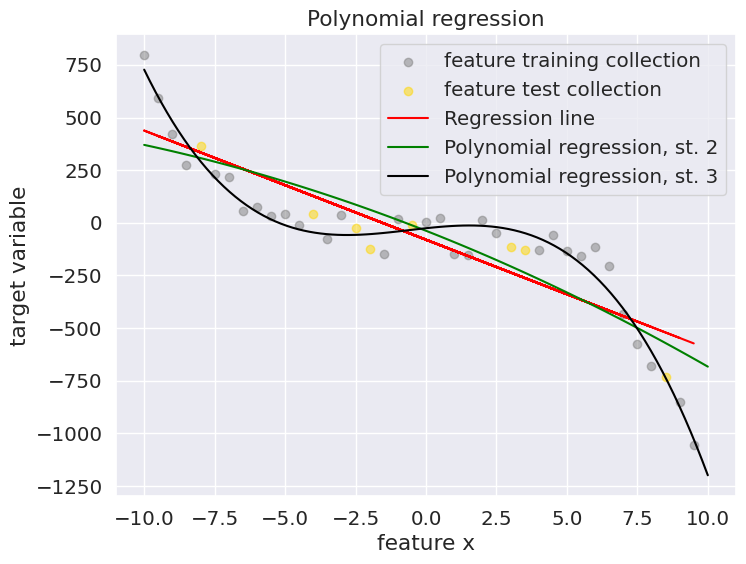

In [ ]:
X_range_3 = np.linspace(-10, 10, 100).reshape(-1, 1)  # Generate 100 evenly spaced values between -10 and 10 for plotting
X_range_poly_3 = poly.transform(X_range_3) # Transform the generated values into polynomial features
y_range_pred_3 = regressor_3.predict(X_range_poly_3) # Predict the target values using the trained polynomial regression model

# Plot training and test datasets with a polynomial regression line of degree 1,2,3
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Polynomial regression, st. 1")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.plot(X_range_3, y_range_pred_3, color='black', label='Polynomial regression, st. 3')
plt.legend()
plt.show()

####Model-based prediction

In [ ]:
# Generate predictions for the test set using the trained linear regression model
y_pred_3 = regressor_3.predict(X_test_poly_3)

# Create a DataFrame to compare the true values (y_yest) with the predicted values
predictions_3 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_3})
predictions_3.head()


,y_true,y_pred
0,-11.939760,-33.300524
1,-123.213118,-53.925604
2,-26.481622,-57.368907
3,-114.799382,-31.616185
4,367.034160,291.848541


In [ ]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_3['error'] = predictions_3['y_true'] - predictions_3['y_pred']
predictions_3.head()

,y_true,y_pred,error
0,-11.939760,-33.300524,21.360764
1,-123.213118,-53.925604,-69.287514
2,-26.481622,-57.368907,30.887285
3,-114.799382,-31.616185,-83.183196
4,367.034160,291.848541,75.185619


In [ ]:
# Calculate the squared error by squaring the prediction errors
predictions_3['error_squared'] = predictions_3['error'] **2
predictions_3.head()

,y_true,y_pred,error,error_squared
0,-11.939760,-33.300524,21.360764,456.282227
1,-123.213118,-53.925604,-69.287514,4800.759606
2,-26.481622,-57.368907,30.887285,954.024360
3,-114.799382,-31.616185,-83.183196,6919.444146
4,367.034160,291.848541,75.185619,5652.877323


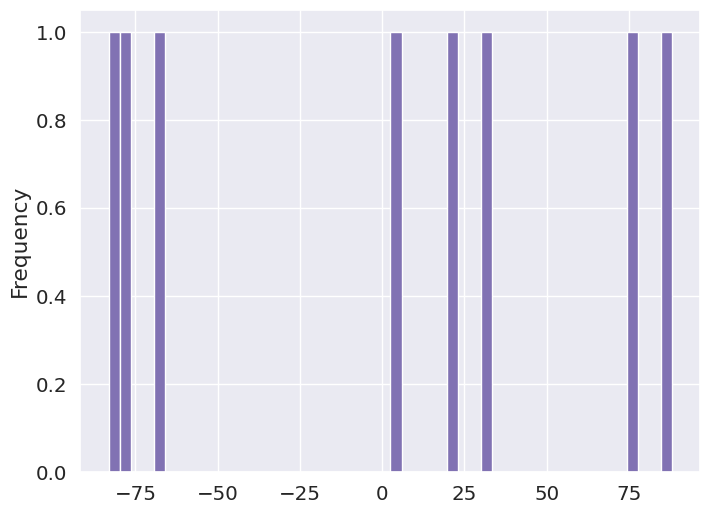

In [ ]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_3['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

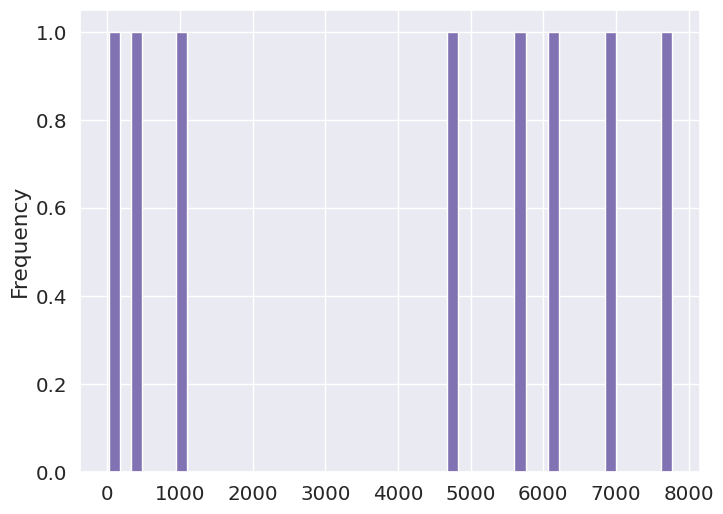

In [ ]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_3['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the third degree metric

- Mean Absolute Error

In [ ]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_3)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_3):.3f}")

The model makes an average error of 56.373


- Mean Squared Error

In [ ]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_3)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_2):.3f}')

The mean squared error of the model is: 13647.132


- Root Mean Squared Error - RMSE

In [ ]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 64.004


- Max Error

In [ ]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_3)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 88.166


- R2 score - coefficient of determination

In [ ]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_3)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.950


###Linear model of the four degree

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the LinearRegression class
poly = PolynomialFeatures(degree=4)


X_train_poly_4 = poly.fit_transform(X_train)
X_test_poly_4 = poly.fit_transform(X_test)

In [ ]:
X_train_poly_4[:10]

array([[   1.    ,    9.5   ,   90.25  ,  857.375 , 8145.0625],
       [   1.    ,   -7.    ,   49.    , -343.    , 2401.    ],
       [   1.    ,    2.5   ,    6.25  ,   15.625 ,   39.0625],
       [   1.    ,   -5.5   ,   30.25  , -166.375 ,  915.0625],
       [   1.    ,   -3.5   ,   12.25  ,  -42.875 ,  150.0625],
       [   1.    ,    5.5   ,   30.25  ,  166.375 ,  915.0625],
       [   1.    ,    7.    ,   49.    ,  343.    , 2401.    ],
       [   1.    ,   -6.    ,   36.    , -216.    , 1296.    ],
       [   1.    ,   -1.5   ,    2.25  ,   -3.375 ,    5.0625],
       [   1.    ,    2.    ,    4.    ,    8.    ,   16.    ]])

In [ ]:
X_test_poly_4[:10]

array([[   1.    ,   -0.5   ,    0.25  ,   -0.125 ,    0.0625],
       [   1.    ,   -2.    ,    4.    ,   -8.    ,   16.    ],
       [   1.    ,   -2.5   ,    6.25  ,  -15.625 ,   39.0625],
       [   1.    ,    3.    ,    9.    ,   27.    ,   81.    ],
       [   1.    ,   -8.    ,   64.    , -512.    , 4096.    ],
       [   1.    ,   -4.    ,   16.    ,  -64.    ,  256.    ],
       [   1.    ,    8.5   ,   72.25  ,  614.125 , 5220.0625],
       [   1.    ,    3.5   ,   12.25  ,   42.875 ,  150.0625]])

In [ ]:
regressor_4 = LinearRegression()
regressor_4.fit(X_train_poly_4, y_train)

LinearRegression()

In [ ]:
# Extract the intercept of the first feature from the linear regression model
intercept_4 = regressor_4.intercept_

intercept_4

-40.80032022624978

In [ ]:
# Extract the coefficient of the first feature from the linear regression model
coef_4 = regressor_4.coef_

coef_4


array([ 0.    , 15.108 , -0.7402, -1.1249, -0.0156])

####Linear model of the four degree - visualization

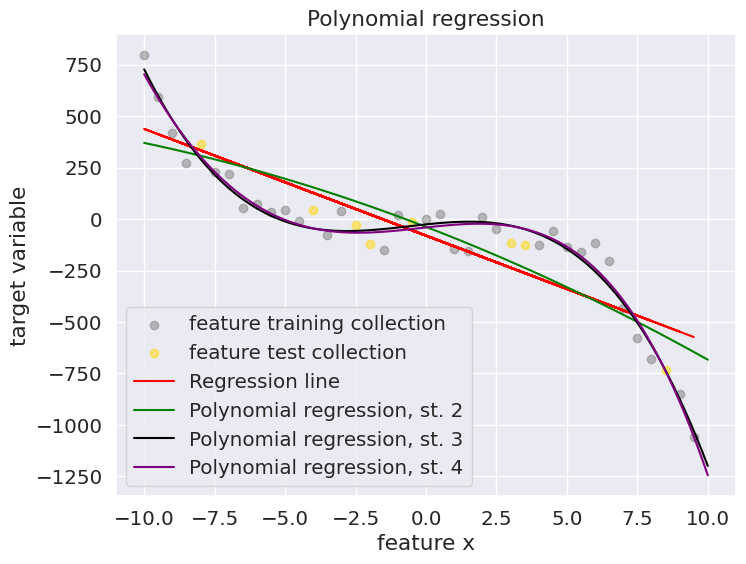

In [ ]:
X_range_4 = np.linspace(-10, 10, 100).reshape(-1, 1) # Generate 100 evenly spaced values between -10 and 10 for plotting
X_range_poly_4 = poly.transform(X_range_4) # Transform the generated values into polynomial features
y_range_pred_4 = regressor_4.predict(X_range_poly_4) # Predict the target values using the trained polynomial regression model


# Plot training and test datasets with a polynomial regression line of degree 1,2,3,4
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Polynomial regression, st. 1")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.plot(X_range_3, y_range_pred_3, color='black', label='Polynomial regression, st. 3')
plt.plot(X_range_4, y_range_pred_4, color='purple', label='Polynomial regression, st. 4')
plt.legend()
plt.show()


####Model-based prediction

In [ ]:
# Generate predictions for the test set using the trained linear regression model
y_pred_4 = regressor_4.predict(X_test_poly_4)

# Create a DataFrame to compare the true values (y_yest) with the predicted values
predictions_4 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_4})
predictions_4.head()

,y_true,y_pred
0,-11.939760,-48.399750
1,-123.213118,-65.227377
2,-26.481622,-66.228893
3,-114.799382,-33.772214
4,367.034160,303.088906


In [ ]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_4['error'] = predictions_4['y_true'] - predictions_4['y_pred']
predictions_4.head()


,y_true,y_pred,error
0,-11.939760,-48.399750,36.459990
1,-123.213118,-65.227377,-57.985741
2,-26.481622,-66.228893,39.747271
3,-114.799382,-33.772214,-81.027168
4,367.034160,303.088906,63.945254


In [ ]:
# Calculate the squared error by squaring the prediction errors
predictions_4['error_squared'] = predictions_4['error'] **2
predictions_4.head()

,y_true,y_pred,error,error_squared
0,-11.939760,-48.399750,36.459990,1329.330860
1,-123.213118,-65.227377,-57.985741,3362.346107
2,-26.481622,-66.228893,39.747271,1579.845549
3,-114.799382,-33.772214,-81.027168,6565.401932
4,367.034160,303.088906,63.945254,4088.995553


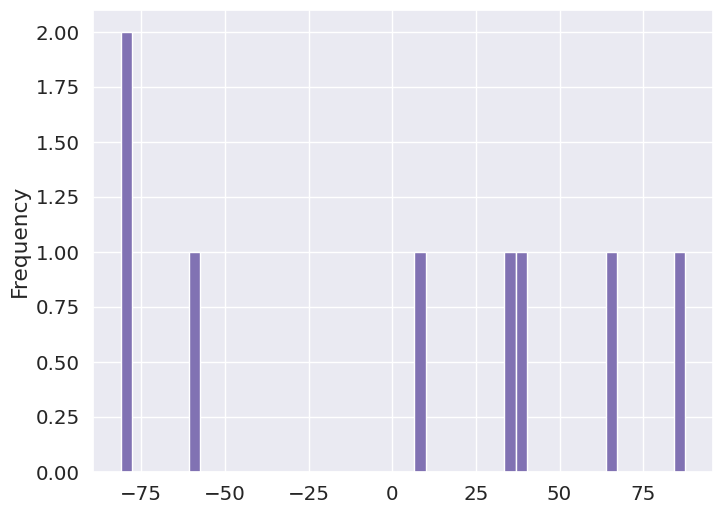

In [ ]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_4['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

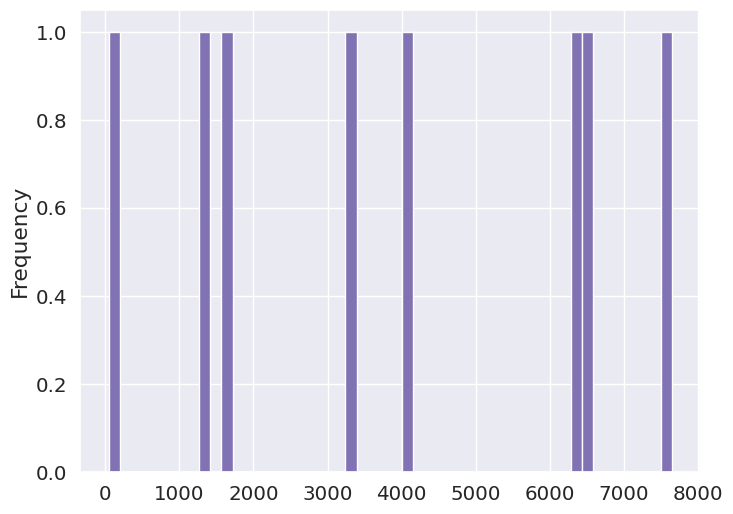

In [ ]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_4['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the four degree metric

- Mean Absolute Error

In [ ]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_4)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_4):.3f}")

The model makes an average error of 56.679


- Mean Squared Error

In [ ]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_4)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_4):.3f}')

The mean squared error of the model is: 3877.931


- Root Mean Squared Error - RMSE

In [ ]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_4))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')


The Root Mean Squared Error (RMSE) of the model is: 62.273


Max Error

In [ ]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_4)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 87.451


- R2 score - coefficient of determination

In [ ]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_4)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.952


###Linear model of the five degree

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures
poly = PolynomialFeatures(degree=5)

# Transform the training and testing data into polynomial features
X_train_poly_5 = poly.fit_transform(X_train)
X_test_poly_5 = poly.fit_transform(X_test)

In [ ]:
X_train_poly_5[:10]

array([[     1.    ,      9.5   ,     90.25  ,    857.375 ,   8145.0625,
         77378.0938],
       [     1.    ,     -7.    ,     49.    ,   -343.    ,   2401.    ,
        -16807.    ],
       [     1.    ,      2.5   ,      6.25  ,     15.625 ,     39.0625,
            97.6562],
       [     1.    ,     -5.5   ,     30.25  ,   -166.375 ,    915.0625,
         -5032.8438],
       [     1.    ,     -3.5   ,     12.25  ,    -42.875 ,    150.0625,
          -525.2188],
       [     1.    ,      5.5   ,     30.25  ,    166.375 ,    915.0625,
          5032.8438],
       [     1.    ,      7.    ,     49.    ,    343.    ,   2401.    ,
         16807.    ],
       [     1.    ,     -6.    ,     36.    ,   -216.    ,   1296.    ,
         -7776.    ],
       [     1.    ,     -1.5   ,      2.25  ,     -3.375 ,      5.0625,
            -7.5938],
       [     1.    ,      2.    ,      4.    ,      8.    ,     16.    ,
            32.    ]])

In [ ]:
X_test_poly_5[:10]

array([[     1.    ,     -0.5   ,      0.25  ,     -0.125 ,      0.0625,
            -0.0312],
       [     1.    ,     -2.    ,      4.    ,     -8.    ,     16.    ,
           -32.    ],
       [     1.    ,     -2.5   ,      6.25  ,    -15.625 ,     39.0625,
           -97.6562],
       [     1.    ,      3.    ,      9.    ,     27.    ,     81.    ,
           243.    ],
       [     1.    ,     -8.    ,     64.    ,   -512.    ,   4096.    ,
        -32768.    ],
       [     1.    ,     -4.    ,     16.    ,    -64.    ,    256.    ,
         -1024.    ],
       [     1.    ,      8.5   ,     72.25  ,    614.125 ,   5220.0625,
         44370.5312],
       [     1.    ,      3.5   ,     12.25  ,     42.875 ,    150.0625,
           525.2188]])

In [ ]:
# Create an instance of the LinearRegression class
regressor_5 = LinearRegression()
regressor_5.fit(X_train_poly_5, y_train)

LinearRegression()

In [ ]:
# Extract the intercept of the first feature from the linear regression model
intercept_5 = regressor_5.intercept_

intercept_5

-40.442214632252146

In [ ]:
# Extract the coefficient of the first feature from the linear regression model
coef_5 = regressor_5.coef_

coef_5

array([ 0.    ,  1.73  , -0.5319, -0.5374, -0.0197, -0.0051])

####Linear model of the five degree - visualization

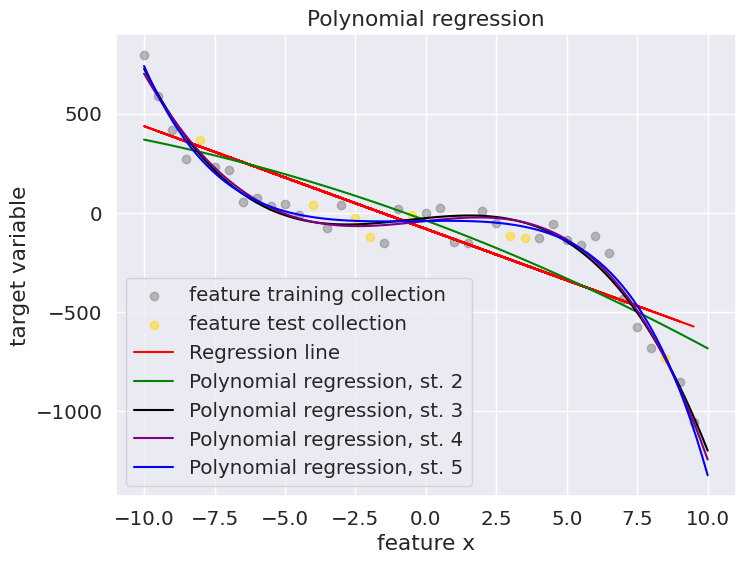

In [ ]:
X_range_5 = np.linspace(-10, 10, 100).reshape(-1, 1) # Generate 100 evenly spaced values between -10 and 10 for plotting
X_range_poly_5 = poly.transform(X_range_5) # Transform the generated values into polynomial features
y_range_pred_5 = regressor_5.predict(X_range_poly_5) # Predict the target values using the trained polynomial regression model


# Plot training and test datasets with a polynomial regression line of degree 1,2,3,4,5
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Polynomial regression, st. 1")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.plot(X_range_3, y_range_pred_3, color='black', label='Polynomial regression, st. 3')
plt.plot(X_range_4, y_range_pred_4, color='purple', label='Polynomial regression, st. 4')
plt.plot(X_range_5, y_range_pred_5, color='blue', label='Polynomial regression, st. 5')
plt.legend()
plt.show()

####Model-based prediction

In [ ]:
# Generate predictions for the test set using the trained linear regression model
y_pred_5 = regressor_5.predict(X_test_poly_5)

# Create a DataFrame to compare the true values (y_yest) with the predicted values
predictions_5 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_5})
predictions_5.head()


,y_true,y_pred
0,-11.939760,-41.374067
1,-123.213118,-41.881827
2,-26.481622,-39.963916
3,-114.799382,-57.392090
4,367.034160,274.052412


In [ ]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_5['error'] = predictions_5['y_true'] - predictions_5['y_pred']
predictions_5.head()

,y_true,y_pred,error
0,-11.939760,-41.374067,29.434307
1,-123.213118,-41.881827,-81.331290
2,-26.481622,-39.963916,13.482294
3,-114.799382,-57.392090,-57.407291
4,367.034160,274.052412,92.981748


In [ ]:
# Calculate the squared error by squaring the prediction errors
predictions_5['error_squared'] = predictions_5['error'] **2
predictions_5.head()


,y_true,y_pred,error,error_squared
0,-11.939760,-41.374067,29.434307,866.378456
1,-123.213118,-41.881827,-81.331290,6614.778777
2,-26.481622,-39.963916,13.482294,181.772263
3,-114.799382,-57.392090,-57.407291,3295.597078
4,367.034160,274.052412,92.981748,8645.605494


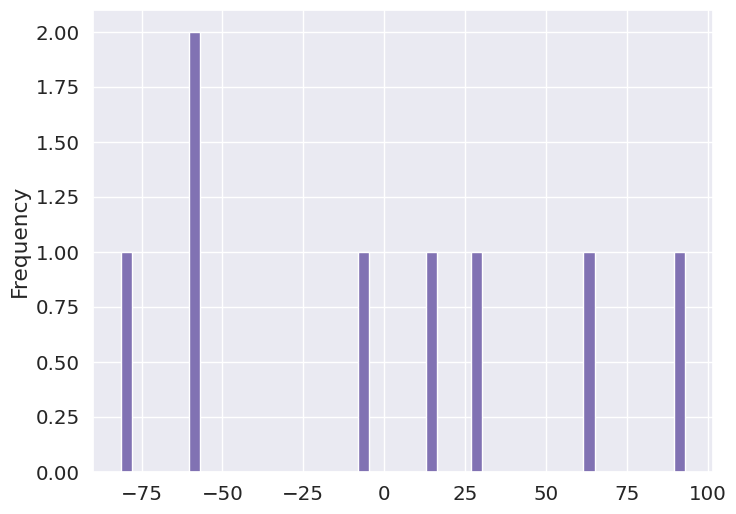

In [ ]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_5['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

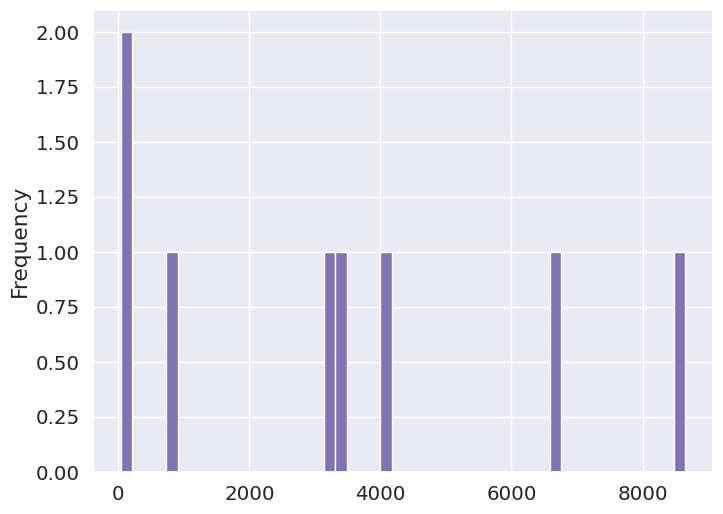

In [ ]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_5['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the five degree metric

- Mean Absolute Error

In [ ]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_5)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_5):.3f}")

The model makes an average error of 50.366


- Mean Squared Error

In [ ]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_5)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_5):.3f}')

The mean squared error of the model is: 3382.830


- Root Mean Squared Error - RMSE

In [ ]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_5))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 58.162


- Max Error

In [ ]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_5)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 92.982


- R2 score - coefficient of determination

In [ ]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_5)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.958


###comparison of metrics

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

# Calculate performance metrics for different polynomial regression models
results = pd.DataFrame(data={
    'name': ['regresja wielomianowa st. 1', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3', 'regresja wielomianowa st. 4', 'regresja wielomianowa st. 5'],
    'r2_score': [r2_score(y_test, y_pred_1), r2_score(y_test, y_pred_2), r2_score(y_test, y_pred_3), r2_score(y_test, y_pred_4), r2_score(y_test, y_pred_5)],
    'mae': [mae(y_test, y_pred_1), mae(y_test, y_pred_2), mae(y_test, y_pred_3), mae(y_test, y_pred_4), mae(y_test, y_pred_5)],
    'mse': [mse(y_test, y_pred_1), mse(y_test, y_pred_2), mse(y_test, y_pred_3), mse(y_test, y_pred_4), mse(y_test, y_pred_5)],
    'rmse': [np.sqrt(mse(y_test, y_pred_1)), np.sqrt(mse(y_test, y_pred_2)), np.sqrt(mse(y_test, y_pred_3)), np.sqrt(mse(y_test, y_pred_4)), np.sqrt(mse(y_test, y_pred_5))],
    'max': [max_error(y_test, y_pred_1), max_error(y_test, y_pred_2), max_error(y_test, y_pred_3), max_error(y_test, y_pred_4), max_error(y_test, y_pred_5)]
    })
results.round(3)

,name,r2_score,mae,mse,rmse,max
0,regresja wielomianowa st. 1,0.825,105.946,14263.442,119.430,210.215
1,regresja wielomianowa st. 2,0.832,103.837,13647.132,116.821,185.918
2,regresja wielomianowa st. 3,0.950,56.373,4096.491,64.004,88.166
3,regresja wielomianowa st. 4,0.952,56.679,3877.931,62.273,87.451
4,regresja wielomianowa st. 5,0.958,50.366,3382.830,58.162,92.982


In [ ]:
# Create a bar chart to visualize the R_2 scores of different polynomial regression models
px.bar(results, x='name', y='r2_score', width=1100, height=500, title ='Polynomial regression - R2_score')

In [ ]:
# Create a bar chart to visualize the Mean Absolute Error (MAE) of different polynomial regression models
px.bar(results, x='name', y='mae', width=1100, height=500, title ='Polynomial regression - mean absolute error')

In [ ]:
# Create a bar chart to visualize the Mean Squared Error (MSE) of different polynomial regression models
px.bar(results, x='name', y='mse', width=1100, height=500, title ='Polynomial regression - mean squared error')

In [ ]:
# Create a bar chart to visualize the Root Mean Squared Error (RMSE) of different polynomial regression models
px.bar(results, x='name', y='rmse', width=1100, height=500, title ='Polynomial regression - root mean squared error')

In [ ]:
# Create a bar chart to visualize the Root Max Error of different polynomial regression models
px.bar(results, x='name', y='max', width=1100, height=500, title ='Polynomial regression - max error')